In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#copy data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
df = pd.read_csv(url, sep = '\t')

In [4]:
#10 first elements
df.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

In [5]:
#the number of observation
len(df)

4622

In [7]:
#the most-ordered item and how many times it was ordered
df["item_name"].value_counts()[:1]

Chicken Bowl    726
Name: item_name, dtype: int64

In [9]:
#different items are sold are
len(df.groupby("item_name"))

50

In [11]:
#items were ordered in total
df.sum()["quantity"]

4972

In [14]:
#Turn the item price into a float
df["item_price_clear"] = df["item_price"].apply(lambda x: float(x[1:]))
df.head(1)#показываю, что работает

order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   

  item_price  item_price_clear  
0     $2.39               2.39

In [25]:
#The price of each item
df[["item_name", "item_price"]].drop_duplicates().reset_index()

index                              item_name item_price
0        0           Chips and Fresh Tomato Salsa     $2.39 
1        1                                   Izze     $3.39 
2        2                       Nantucket Nectar     $3.39 
3        3  Chips and Tomatillo-Green Chili Salsa     $2.39 
4        4                           Chicken Bowl    $16.98 
5        5                           Chicken Bowl    $10.98 
6        6                          Side of Chips     $1.69 
7        7                          Steak Burrito    $11.75 
8        8                       Steak Soft Tacos     $9.25 
9        9                          Steak Burrito     $9.25 
10      10                    Chips and Guacamole     $4.45 
11      11                   Chicken Crispy Tacos     $8.75 
12      12                     Chicken Soft Tacos     $8.75 
13      13                           Chicken Bowl    $11.25 
14      16                        Chicken Burrito     $8.49 
15      18                            Canned Soda     $2.18 
16      19                           Chicken Bowl     $8.75 
17      21                       Barbacoa Burrito     $8.99 
18      23                        Chicken Burrito    $10.98 
19      26                           Chicken Bowl     $8.49 
20      27                       Carnitas Burrito     $8.99 
21      28                            Canned Soda     $1.09 
22      31                          Steak Burrito     $8.99 
23      33                          Carnitas Bowl     $8.99 
24      34                          Bottled Water     $1.09 
25      38  Chips and Tomatillo Green Chili Salsa     $2.95 
26      39                          Barbacoa Bowl    $11.75 
27      40                                  Chips     $2.15 
28      44                     Chicken Salad Bowl     $8.75 
29      49                    Chips and Guacamole     $3.99 
..     ...                                    ...        ...
179   3195                          Barbacoa Bowl     $8.69 
180   3252                       Carnitas Burrito     $8.69 
181   3276                       Barbacoa Burrito    $11.48 
182   3294                          Bottled Water     $4.50 
183   3334                             Steak Bowl    $26.07 
184   3354                             Steak Bowl    $18.50 
185   3375                        Chicken Burrito    $16.98 
186   3389                      6 Pack Soft Drink    $12.98 
187   3480                          Carnitas Bowl    $35.25 
188   3502                            Steak Salad     $8.69 
189   3598           Chips and Fresh Tomato Salsa    $44.25 
190   3599                          Bottled Water    $10.50 
191   3601                         Veggie Burrito    $33.75 
192   3634                        Chicken Burrito    $26.25 
193   3658                     Chicken Soft Tacos    $21.96 
194   3750                         Carnitas Salad     $8.99 
195   3823                        Chicken Burrito    $16.38 
196   3887                          Side of Chips    $13.52 
197   3889                      Veggie Soft Tacos    $16.98 
198   3890                  Carnitas Crispy Tacos    $17.98 
199   3891                   Chicken Crispy Tacos    $16.98 
200   3973                      Canned Soft Drink     $5.00 
201   3989                          Chicken Salad     $8.19 
202   4152                          Bottled Water    $15.00 
203   4235                           Chicken Bowl     $8.50 
204   4237                    Chips and Guacamole     $8.50 
205   4354                       Steak Soft Tacos    $18.50 
206   4489                    Chips and Guacamole    $17.80 
207   4509                                  Chips     $1.99 
208   4510                          Barbacoa Bowl    $11.49 

[209 rows x 3 columns]

In [30]:
#the revenue for the period in the dataset is
(df["item_price_clear"] * df["quantity"]).sum()

39237.02

In [34]:
#orders were made in the period
df["order_id"].value_counts().count()

1834

In [47]:
#the average revenue amount per order is
((df["item_price_clear"] * df["quantity"]).sum()) / (df["order_id"].value_counts().count())

21.39423118865867

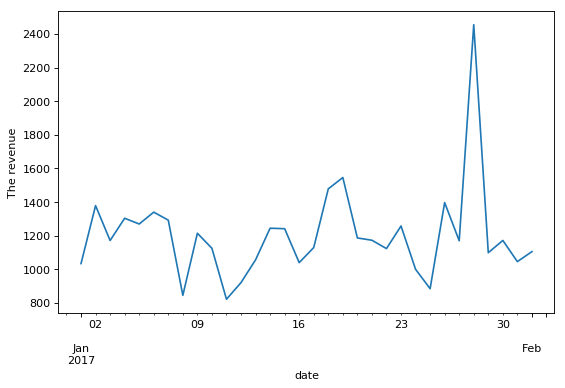

In [81]:
#Merge the table dfa that contains order date and order id with df and plot daily revenue
dfa = pd.DataFrame({"date": np.random.choice(pd.date_range(start="20170101", end="20170201"), size=1800),
                   "order_id": np.arange(1800)})
df["cost"]=df["item_price_clear"]*df["quantity"]
dfa["cost"]=df.groupby('order_id').sum()["cost"]
plt.figure(figsize=(8, 5), dpi=80)
plt.ylabel('The revenue')
plt.xticks(np.arange(0, 50, step=5))
dfa.groupby('date').sum()["cost"].plot()

In [89]:
#Sort the dataset by the name of the item
df.sort_values(by="item_name")

order_id  quantity          item_name  \
3389      1360         2  6 Pack Soft Drink   
341        148         1  6 Pack Soft Drink   
1849       749         1  6 Pack Soft Drink   
1860       754         1  6 Pack Soft Drink   
2713      1076         1  6 Pack Soft Drink   
3422      1373         1  6 Pack Soft Drink   
553        230         1  6 Pack Soft Drink   
1916       774         1  6 Pack Soft Drink   
1922       776         1  6 Pack Soft Drink   
1937       784         1  6 Pack Soft Drink   
3836      1537         1  6 Pack Soft Drink   
298        129         1  6 Pack Soft Drink   
1976       798         1  6 Pack Soft Drink   
1167       481         1  6 Pack Soft Drink   
3875      1554         1  6 Pack Soft Drink   
1124       465         1  6 Pack Soft Drink   
3886      1558         1  6 Pack Soft Drink   
2108       849         1  6 Pack Soft Drink   
3010      1196         1  6 Pack Soft Drink   
4535      1803         1  6 Pack Soft Drink   
4169      1664         1  6 Pack Soft Drink   
4174      1666         1  6 Pack Soft Drink   
4527      1800         1  6 Pack Soft Drink   
4522      1798         1  6 Pack Soft Drink   
3806      1525         1  6 Pack Soft Drink   
2389       949         1  6 Pack Soft Drink   
3132      1248         1  6 Pack Soft Drink   
3141      1253         1  6 Pack Soft Drink   
639        264         1  6 Pack Soft Drink   
1026       422         1  6 Pack Soft Drink   
...        ...       ...                ...   
2996      1192         1       Veggie Salad   
3163      1263         1       Veggie Salad   
4084      1635         1       Veggie Salad   
1694       686         1       Veggie Salad   
2756      1094         1       Veggie Salad   
4201      1677         1  Veggie Salad Bowl   
1884       760         1  Veggie Salad Bowl   
455        195         1  Veggie Salad Bowl   
3223      1289         1  Veggie Salad Bowl   
2223       896         1  Veggie Salad Bowl   
2269       913         1  Veggie Salad Bowl   
4541      1805         1  Veggie Salad Bowl   
3293      1321         1  Veggie Salad Bowl   
186         83         1  Veggie Salad Bowl   
960        394         1  Veggie Salad Bowl   
1316       536         1  Veggie Salad Bowl   
2156       869         1  Veggie Salad Bowl   
4261      1700         1  Veggie Salad Bowl   
295        128         1  Veggie Salad Bowl   
4573      1818         1  Veggie Salad Bowl   
2683      1066         1  Veggie Salad Bowl   
496        207         1  Veggie Salad Bowl   
4109      1646         1  Veggie Salad Bowl   
738        304         1  Veggie Soft Tacos   
3889      1559         2  Veggie Soft Tacos   
2384       948         1  Veggie Soft Tacos   
781        322         1  Veggie Soft Tacos   
2851      1132         1  Veggie Soft Tacos   
1699       688         1  Veggie Soft Tacos   
1395       567         1  Veggie Soft Tacos   

                                     choice_description item_price  \
3389                                        [Diet Coke]    $12.98    
341                                         [Diet Coke]     $6.49    
1849                                             [Coke]     $6.49    
1860                                        [Diet Coke]     $6.49    
2713                                             [Coke]     $6.49    
3422                                             [Coke]     $6.49    
553                                         [Diet Coke]     $6.49    
1916                                        [Diet Coke]     $6.49    
1922                                             [Coke]     $6.49    
1937                                        [Diet Coke]     $6.49    
3836                                             [Coke]     $6.49    
298                                            [Sprite]     $6.49    
1976                                        [Diet Coke]     $6.49    
1167                                             [Coke]     $6.49    
3875                                     

In [103]:
# Veggie Salad Bowl ordered
df["item_name"].value_counts()['Veggie Salad Bowl']

18

In [109]:
#people orderd more than one Canned Soda
len(df[df.item_name == 'Canned Soda'][df.quantity > 1])

C:\Users\Egor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


20

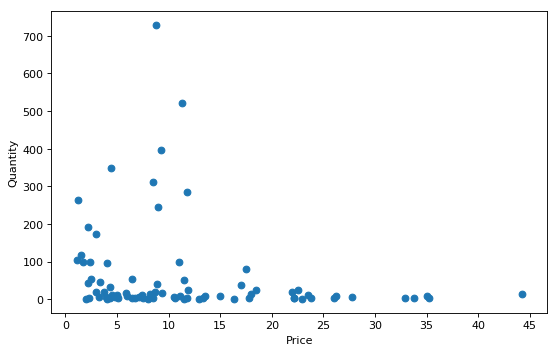

In [152]:
#scatterplot with the number of items orderered per order price
df1=df.groupby('item_price_clear').sum()["quantity"].reset_index()
plt.figure(figsize=(8, 5), dpi=80)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.xticks(np.arange(0, 50, step=5))
plt.scatter(df1.values[:,0],df1.values[:,1])
plt.show()